In [1]:
import numpy as np
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors import KernelDensity
import seaborn as sns
%matplotlib inline

In [3]:

f = open("./crater_tuto", "rb")
crater = pickle.load(f)
f.close()


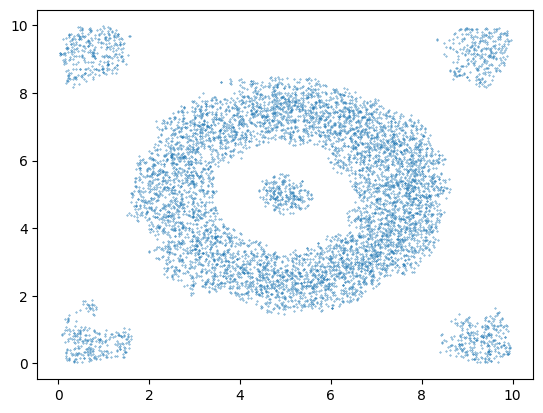

In [4]:
plt.scatter(crater[:, 0], crater[:, 1], s = 0.1);

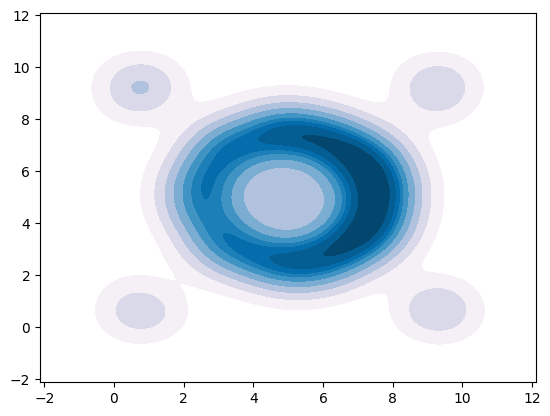

In [7]:
sns.kdeplot(
    x = crater[:, 0], 
    y = crater[:, 1], 
    fill = True, 
    cmap = "PuBu", 
    bw_method = .3
);

In [8]:


xval = np.arange(0, 10, 0.05)
yval = np.arange(0, 10, 0.05)
nx = len(xval)
ny = len(yval)



In [9]:
kde = KernelDensity(kernel = 'gaussian', bandwidth = 0.3).fit(crater)
positions = np.array([[u, v] for u in xval for v in yval])

In [10]:
filt_values = -kde.score_samples(X = positions)

print(min(filt_values), max(filt_values))


3.265212188580218 26.527204685017274


In [11]:


cc_density_crater = gd.CubicalComplex(
    dimensions = [nx ,ny], 
    top_dimensional_cells = filt_values
)



In [12]:
print(filt_values.shape)

(40000,)


In [13]:
print(nx, ny, nx*ny)

200 200 40000
